In [11]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy import linalg
from scipy.sparse import linalg
import matplotlib.pyplot as plt

In [12]:
# definition of TF Ising Model function

def get_hamiltonian_sparse(L, J, hx):
    '''
    Creates the Hamiltonian of the Transverse Field Ising model
    on a linear chain lattice with periodic boundary conditions.

    Args:
        L (int): length of chain
        J (float): coupling constant for Ising term
        hx (float): coupling constant for transverse field

    Returns:
        (hamiltonian_rows, hamiltonian_cols, hamiltonian_data) where:
        hamiltonian_rows (list of ints): row index of non-zero elements
        hamiltonian_cols (list of ints): column index of non-zero elements
        hamiltonian_data (list of floats): value of non-zero elements
    '''

    def get_site_value(state, site):
        ''' Function to get local value at a given site '''
        return (state >> site) & 1

    def hilbertspace_dimension(L):
        ''' return dimension of hilbertspace '''
        return 2**L

    # Define chain lattice
    ising_bonds = [(site, (site+1)%L) for site in range(L)]

    # Empty lists for sparse matrix
    hamiltonian_rows = []
    hamiltonian_cols = []
    hamiltonian_data = []

    # Run through all spin configurations
    for state in range(hilbertspace_dimension(L)):

        # Apply Ising bonds
        ising_diagonal = 0
        for bond in ising_bonds:
            if get_site_value(state, bond[0]) == get_site_value(state, bond[1]):
                ising_diagonal += J
            else:
                ising_diagonal -= J
        hamiltonian_rows.append(state)
        hamiltonian_cols.append(state)
        hamiltonian_data.append(ising_diagonal)

        # Apply transverse field
        for site in range(L):

            # Flip spin at site
            new_state = state ^ (1 << site)
            hamiltonian_rows.append(new_state)
            hamiltonian_cols.append(state)
            hamiltonian_data.append(hx)

    return hamiltonian_rows, hamiltonian_cols, hamiltonian_data

In [13]:
L=8     # length of chain, keep it smaller than ~16, :-)
J=1      # strength of Ising interaction
hx=0.5   # strangth of transverse field

rows, cols, data = get_hamiltonian_sparse(L, J, hx)
hamiltonian = sp.sparse.csr_matrix((data, (rows, cols)))

eigs = sp.linalg.eigh(hamiltonian.todense(), eigvals_only=True)

print(min(eigs)/L)
print(hamiltonian.shape) # How big the matrix?

-1.0636352793925363
(256, 256)


Test this program can run normally

The nest step we set transverse field is zero, and we measure the energy of the standard Ising model

Text(0.5, 1.0, 'Energy Level of Ising Chain')

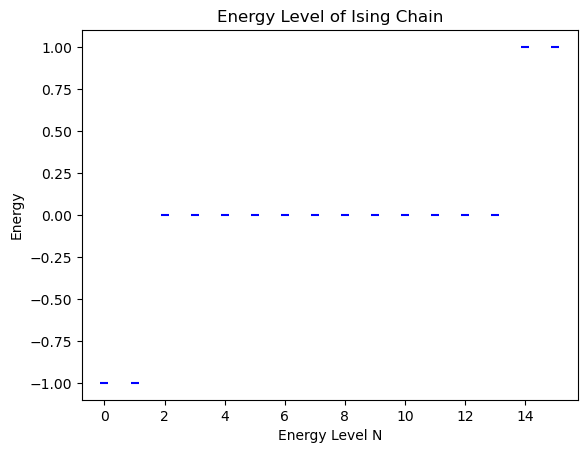

In [14]:
L=4     # length of chain, keep it smaller than ~16, :-)
J=-1.0      # strength of Ising interaction
hx=0   # strangth of transverse field

rows, cols, data = get_hamiltonian_sparse(L, J, hx)
hamiltonian = sp.sparse.csr_matrix((data, (rows, cols)))

eigs = sp.linalg.eigh(hamiltonian.todense(), eigvals_only=True)
        
energy_level=np.sort(eigs/L)
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_',color='blue')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Ising Chain')

Test changing J:

In [15]:
L=8     # length of chain, keep it smaller than ~16, :-)
J=-1.0      # strength of Ising interaction
hx=0   # strangth of transverse field

J_array = np.array([])
E = np.array([])

for i in range(int(1/0.01)+1):
    J += 0.01

    rows, cols, data = get_hamiltonian_sparse(L, J, hx)
    hamiltonian = sp.sparse.csr_matrix((data, (rows, cols)))

    eigs = sp.linalg.eigh(hamiltonian.todense(), eigvals_only=True)
        
    J_array = np.append(J_array,J)
    E = np.append(E, min(eigs)/L)

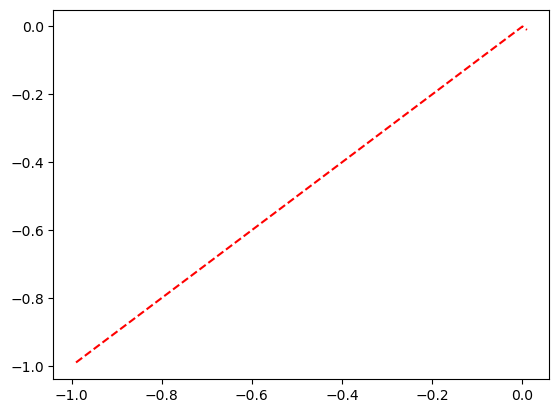

In [16]:
plt.plot(J_array,E,'--',color='red')
plt.show()

Then we open the transverse field.

Text(0.5, 1.0, 'Energy Level of Ising Chain')

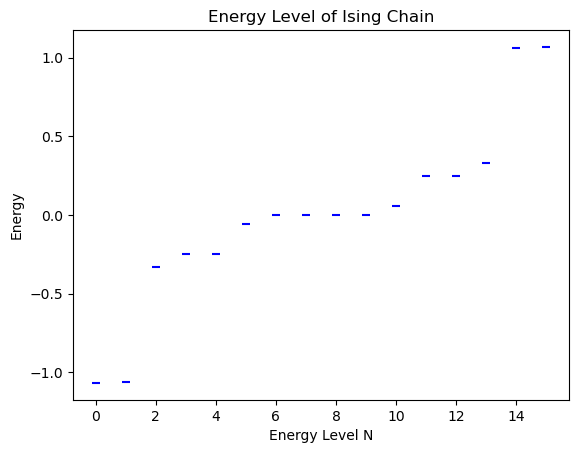

In [17]:
L=4     # length of chain, keep it smaller than ~16, :-)
J=1.0      # strength of Ising interaction
hx=-0.5   # strangth of transverse field

rows, cols, data = get_hamiltonian_sparse(L, J, hx)
hamiltonian = sp.sparse.csr_matrix((data, (rows, cols)))

eigs = sp.linalg.eigh(hamiltonian.todense(), eigvals_only=True)
        
energy_level=np.sort(eigs/L)
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_',color='blue')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Ising Chain')

In [18]:
L=8     # length of chain, keep it smaller than ~16, :-)
J=1      # strength of Ising interaction
hx=-0.5   # strangth of transverse field

hengchang = np.array([])
E = np.array([])

for i in range(int(1/0.01)+1):
    hx += 0.01

    rows, cols, data = get_hamiltonian_sparse(L, J, hx)
    hamiltonian = sp.sparse.csr_matrix((data, (rows, cols)))

    eigs = sp.linalg.eigh(hamiltonian.todense(), eigvals_only=True)
        
    hengchang = np.append(hengchang,hx)
    E = np.append(E, min(eigs)/L)

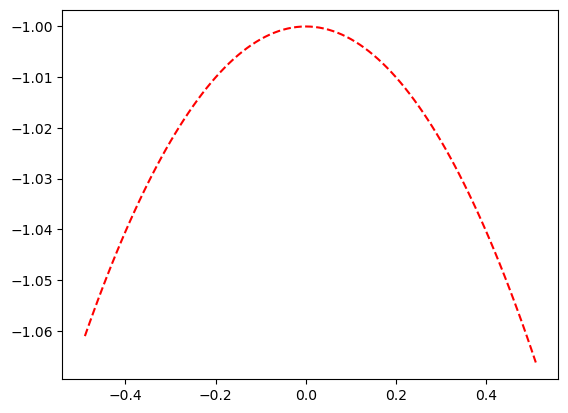

In [19]:
plt.plot(hengchang,E,'--',color='red')
plt.show()